In [273]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split



In [274]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('submission.csv')
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_2'].mode()[0])
train['Product_Category_3'] = train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0])

test['Product_Category_2'] = test['Product_Category_2'].fillna(test['Product_Category_2'].mode()[0])
test['Product_Category_3'] = test['Product_Category_3'].fillna(test['Product_Category_3'].mode()[0])




In [276]:
def feature_eng_Purchase(data,group):
    min_df = data.groupby(group).Purchase.min() 
    max_df = data.groupby(group).Purchase.max()
    mean_df = data.groupby(group).Purchase.mean()
    twentyfive_df = data.groupby(group).Purchase.quantile(.25)
    seventyfive_df = data.groupby(group).Purchase.quantile(.75)
    #ninty_df = data.groupby(group).Purchase.quantile(.90)
    return min_df, max_df, mean_df, twentyfive_df, seventyfive_df

def mapping(colnames , values, df, map_):
    for i in range(len(values)):
        df[colnames[i]] = df[map_].map(values[i])
    return df

In [277]:

P_min_df, P_max_df, P_mean_df, P_twentyfive_df, P_seventyfive_df= feature_eng_Purchase(train,'Product_ID')
values = [P_min_df, P_max_df, P_mean_df, P_twentyfive_df, P_seventyfive_df]
colnames = ['P_min', 'P_max', 'P_mean', 'P_twentyfive', 'P_seventyfive']
train_df = mapping(colnames , values, train, 'Product_ID')

U_min_df, U_max_df, U_mean_df, U_twentyfive_df, U_seventyfive_df = feature_eng_Purchase(train,'User_ID')
values = [U_min_df, U_max_df, U_mean_df, U_twentyfive_df, U_seventyfive_df]
colnames = ['U_min', 'U_max', 'U_mean', 'U_twentyfive', 'U_seventyfive']
train_df = mapping(colnames , values, train, 'User_ID')

In [278]:
#P_min_df, P_max_df, P_mean_df, P_twentyfive_df, P_seventyfive_df, P_nintyfive_df = feature_eng_Purchase(test,'Product_ID')
values = [P_min_df, P_max_df, P_mean_df, P_twentyfive_df, P_seventyfive_df]
colnames = ['P_min', 'P_max', 'P_mean', 'P_twentyfive', 'P_seventyfive']
test_df = mapping(colnames , values, test, 'Product_ID')


#U_min_df, U_max_df, U_mean_df, U_twentyfive_df, U_seventyfive_df, U_nintyfive_df = feature_eng_Purchase(train,'User_ID')
values = [U_min_df, U_max_df, U_mean_df, U_twentyfive_df, U_seventyfive_df]
colnames = ['U_min', 'U_max', 'U_mean', 'U_twentyfive', 'U_seventyfive']
test_df = mapping(colnames , values, test, 'User_ID')

In [279]:
Pcat1_min_df, Pcat1_max_df, Pcat1_mean_df, Pcat1_twentyfive_df, Pcat1_seventyfive_df = feature_eng_Purchase(train,'Product_Category_1')
values = [Pcat1_min_df, Pcat1_max_df, Pcat1_mean_df, Pcat1_twentyfive_df, Pcat1_seventyfive_df]
colnames = ['Pcat1_min', 'Pcat1_max', 'Pcat1_mean', 'Pcat1_twentyfive', 'Pcat1_seventyfive']
train_df = mapping(colnames , values, train, 'Product_Category_1')

Pcat2_min_df, Pcat2_max_df, Pcat2_mean_df, Pcat2_twentyfive_df, Pcat2_seventyfive_df = feature_eng_Purchase(train,'Product_Category_2')
values = [Pcat2_min_df, Pcat2_max_df, Pcat2_mean_df, Pcat2_twentyfive_df, Pcat2_seventyfive_df]
colnames = ['Pcat2_min', 'Pcat2_max', 'Pcat2_mean', 'Pcat2_twentyfive', 'Pcat2_seventyfive']
train_df = mapping(colnames , values, train, 'Product_Category_2')

Pcat3_min_df, Pcat3_max_df, Pcat3_mean_df, Pcat3_twentyfive_df, Pcat3_seventyfive_df = feature_eng_Purchase(train,'Product_Category_3')
values = [Pcat3_min_df, Pcat3_max_df, Pcat3_mean_df, Pcat3_twentyfive_df, Pcat3_seventyfive_df]
colnames = ['Pcat3_min', 'Pcat3_max', 'Pcat3_mean', 'Pcat3_twentyfive', 'Pcat3_seventyfive']
train_df = mapping(colnames , values, train, 'Product_Category_3')



In [280]:
#Pcat1_min_df, Pcat1_max_df, Pcat1_mean_df, Pcat1_twentyfive_df, Pcat1_seventyfive_df = feature_eng_Purchase(test,'Product_Category_1')
values = [Pcat1_min_df, Pcat1_max_df, Pcat1_mean_df, Pcat1_twentyfive_df, Pcat1_seventyfive_df]
colnames = ['Pcat1_min', 'Pcat1_max', 'Pcat1_mean', 'Pcat1_twentyfive', 'Pcat1_seventyfive']
test_df = mapping(colnames , values, test, 'Product_Category_1')

#Pcat2_min_df, Pcat2_max_df, Pcat2_mean_df, Pcat2_twentyfive_df, Pcat2_seventyfive_df = feature_eng_Purchase(train,'Product_Category_2')
values = [Pcat2_min_df, Pcat2_max_df, Pcat2_mean_df, Pcat2_twentyfive_df, Pcat2_seventyfive_df]
colnames = ['Pcat2_min', 'Pcat2_max', 'Pcat2_mean', 'Pcat2_twentyfive', 'Pcat2_seventyfive']
test_df = mapping(colnames , values, test, 'Product_Category_2')

#Pcat3_min_df, Pcat3_max_df, Pcat3_mean_df, Pcat3_twentyfive_df, Pcat3_seventyfive_df = feature_eng_Purchase(train,'Product_Category_3')
values = [Pcat3_min_df, Pcat3_max_df, Pcat3_mean_df, Pcat3_twentyfive_df, Pcat3_seventyfive_df]
colnames = ['Pcat3_min', 'Pcat3_max', 'Pcat3_mean', 'Pcat3_twentyfive', 'Pcat3_seventyfive']
test_df = mapping(colnames , values, test, 'Product_Category_3')




In [281]:
full_df = pd.concat([train_df, test_df])

/Users/arjunbenney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [282]:
cat_cols = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
full_df[cat_cols] = full_df[cat_cols].apply(le.fit_transform)


In [283]:
cat_cols = ['User_ID', 'Product_ID']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
full_df[cat_cols] = full_df[cat_cols].astype('str').apply(le.fit_transform)




In [284]:

train = full_df.head(train_df.shape[0])
test = full_df.tail(test_df.shape[0])

In [285]:
H = train.groupby('Occupation').Purchase.quantile(.25)
train['occ_25'] = train.Occupation.map(H)
test['occ_25'] = test.Occupation.map(H)

L = train.groupby('Occupation').Purchase.quantile(.75)
train['occ_75'] = train.Occupation.map(L)
test['occ_75'] = test.Occupation.map(L)



/Users/arjunbenney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/arjunbenney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/arjunbenney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

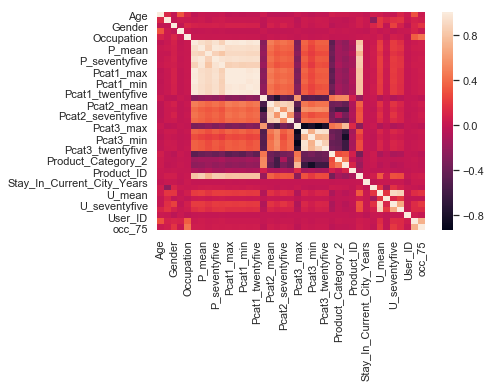

In [286]:
sns.heatmap(train.corr())

## XGBOOST:

In [287]:
y = train.Purchase
X = train.drop('Purchase',1)
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20, random_state=42)
D_matrix = xgb.DMatrix(data=X,label=y)

In [311]:


parameters = {
              'objective':['reg:linear'],
              'learning_rate': [.03], #so called `eta` value
              'max_depth': [9,10,11],
              'min_child_weight': [9,10,11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              'n_estimators': [1100],
            }
xgb1 = xgb.XGBRegressor(objective='reg:linear',n_jobs = -1)
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True,
                       scoring = 'neg_mean_squared_error')



In [ ]:
xgb_grid.fit(Xtrain,ytrain)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


In [292]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


-6077612.46405
{'colsample_bytree': 0.8, 'silent': 1, 'learning_rate': 0.1, 'min_child_weight': 12, 'n_estimators': 500, 'subsample': 0.8, 'objective': 'reg:linear', 'max_depth': 10}


In [158]:
xgb_new = xgb_grid.best_estimator_
xgb_new.n_estimators = 1000

In [159]:
xgb_new.fit(Xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=8, min_child_weight=7, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.9)

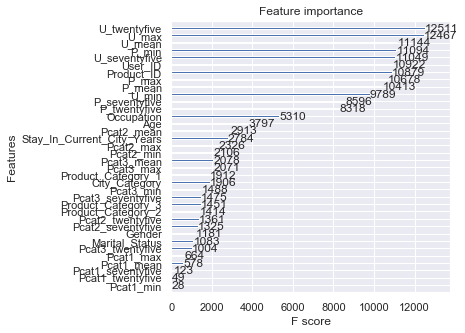

In [160]:
xgb.plot_importance(xgb_new)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [189]:
preds = xgb_new.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

Exception AttributeError: "'DMatrix' object has no attribute 'handle'" in <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x120fe9950>> ignored


NameError: name 'xgb_new' is not defined

In [42]:
test = test.drop('Purchase',1)

In [163]:
pred_test = xgb_new.predict(test)
pred_df = pd.DataFrame()
pred_df['Purchase'] = preds
test = pd.read_csv('test.csv')
sample_submission = pd.concat([test[['User_ID','Product_ID']], pred_df],1)
sample_submission.to_csv('Submission9.csv',header = True, index = 0)

In [307]:
def runXGB(train_X, train_y, test_X):
        params = {}
        params["objective"] = "reg:linear"
        params["eta"] = 0.05
        params["min_child_weight"] = 12
        params["subsample"] = 0.8
        params["colsample_bytree"] = 0.8
        params["silent"] = 1
        params["max_depth"] = 10
        #params["max_delta_step"]=2
        params["seed"] = 0
        #params['eval_metric'] = "auc"
        plst = list(params.items())
        num_rounds = 1100

        xgtrain = xgb.DMatrix(train_X, label=train_y)
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)
        xgb.plot_importance(model)
        plt.rcParams['figure.figsize'] = [5, 5]
        plt.show()
        pred_test_y = model.predict(xgtest)
        return pred_test_y

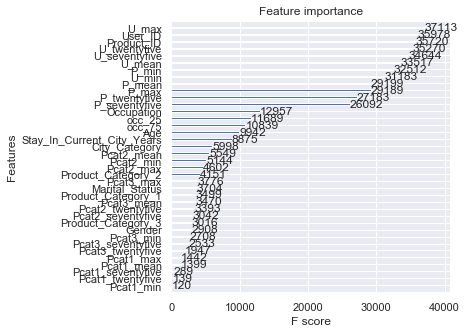

In [308]:

pred_new = runXGB(Xtrain,ytrain,Xtest)

In [309]:
pred_new[pred_new<0] = 1

In [310]:
rmse = np.sqrt(mean_squared_error(ytest, pred_new))
print("RMSE: %f" % (rmse))

RMSE: 2411.703600


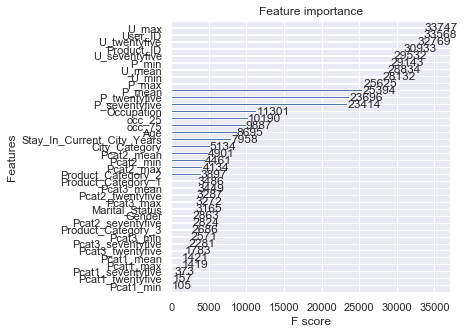

In [305]:
test_n = test.drop('Purchase',1)
pred_new = runXGB(X,y,test_n)


In [306]:
pred_new[pred_new<0] = 1
pred_df = pd.DataFrame()
pred_df['Purchase'] = pred_new
test_1 = pd.read_csv('test.csv')
sample_submission = pd.concat([test_1[['User_ID','Product_ID']], pred_df],1)
sample_submission.to_csv('Submission2.csv',header = True, index = 0)

In [197]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
5         15227.0
6         19215.0
7         15854.0
8         15686.0
9          7871.0
10         5254.0
11         3957.0
12         6073.0
13        15665.0
14         5378.0
15         2079.0
16        13055.0
17         8851.0
18        11788.0
19        19614.0
20         8584.0
21         9872.0
22         9743.0
23         5982.0
24        11927.0
25        16662.0
26         5887.0
27         6973.0
28         5391.0
29        16352.0
           ...   
550038      596.0
550039      595.0
550040       26.0
550041      488.0
550042      243.0
550043       48.0
550044       62.0
550045      252.0
550046      236.0
550047      244.0
550048      591.0
550049      473.0
550050      368.0
550051      489.0
550052      239.0
550053      371.0
550054       60.0
550055      238.0
550056      254.0
550057       61.0
550058      121.0
550059       48.0
550060      494.0
550061      599.0
550062    